In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [3]:
# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
# Define the size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Define the input layer
input_img = Input(shape=(784,))

# Define the encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoding layer
decoded = Dense(784, activation='sigmoid')(encoded)

In [5]:
# Define the autoencoder model (maps an input to its reconstruction)
autoencoder = Model(input_img, decoded)

In [6]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50

235/235 [==============================] - 4s 10ms/step - loss: 0.2738 - val_loss: 0.1884
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1694 - val_loss: 0.1524
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1436 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1283 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1186 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1119 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1069 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1031 - val_loss: 0.1003
Epoch 9/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1004 - val_loss: 0.0978
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0983 - val_loss

In [8]:
# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


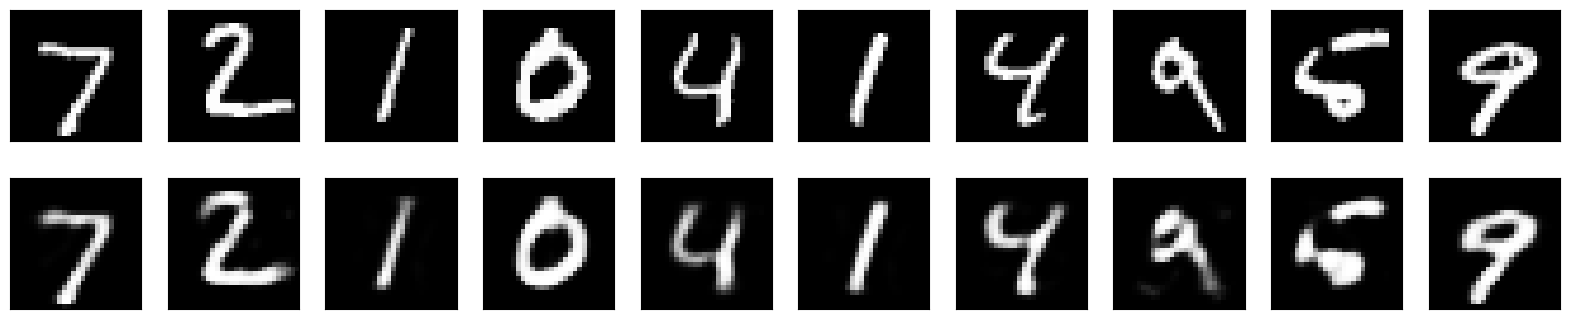

In [11]:
# Visualise the reconstructed inputs
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()